In [ ]:
!pip install d2l==1.0.0-alpha1.post0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 332 kB/s 
     |████████████████████████████████| 121 kB 23.1 MB/s 
     |████████████████████████████████| 1.6 MB 13.6 MB/s 
     |████████████████████████████████| 83 kB 723 kB/s 


In [ ]:
import matplotlib.pyplot as plt

import torch
import torch
from torch import nn
import collections
import math
import torch
from torch import nn
from d2l import torch as d2l
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
from torch.nn import functional as F
import torchvision
from torch import nn
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')
from torchvision import datasets, transforms

## The fastest way of upload the data to the VM is to upload data on google-drive and to mount google-drive on your colab environment : 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the source with your Drive structure :

In [ ]:
!cp /content/drive/MyDrive/MachineLearningFinal/badVsgood.zip .

In [ ]:
!cp /content/drive/MyDrive/MachineLearningFinal/prices-split-adjusted.csv .

In [ ]:
!unzip badVsgood.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: badVsgood/badVsgood/train/1/0611.jpg  
  inflating: badVsgood/badVsgood/train/1/0612.jpg  
  inflating: badVsgood/badVsgood/train/1/0613.jpg  
  inflating: badVsgood/badVsgood/train/1/0614.jpg  
  inflating: badVsgood/badVsgood/train/1/0615.jpg  
  inflating: badVsgood/badVsgood/train/1/0616.jpg  
  inflating: badVsgood/badVsgood/train/1/0617.jpg  
  inflating: badVsgood/badVsgood/train/1/0618.jpg  
  inflating: badVsgood/badVsgood/train/1/0619.jpg  
  inflating: badVsgood/badVsgood/train/1/0620.jpg  
  inflating: badVsgood/badVsgood/train/1/0621.jpg  
  inflating: badVsgood/badVsgood/train/1/0622.jpg  
  inflating: badVsgood/badVsgood/train/1/0623.jpg  
  inflating: badVsgood/badVsgood/train/1/0624.jpg  
  inflating: badVsgood/badVsgood/train/1/0625.jpg  
  inflating: badVsgood/badVsgood/train/1/0626.jpg  
  inflating: badVsgood/badVsgood/train/1/0627.jpg  
  inflating: badVsgood/badVsgood/train

# Financial data predicition

Upload the price-split-adjusted.csv

In [ ]:
# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

### Preprocessing part (helper) :

In [ ]:
# import all stock prices 
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df.info()
df.head()

# number of different stocks
print('\nnumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol))[:10])

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

number of different stocks:  501
['OXY', 'M', 'ZTS', 'ABT', 'SNA', 'EMR', 'PSX', 'HAS', 'AON', 'USB']


In [ ]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

Evolution of the google action :

In [ ]:
df.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [ ]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


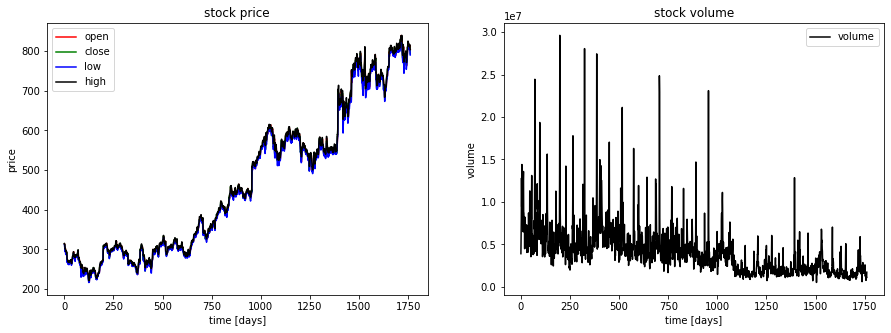

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'GOOGL'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'GOOGL'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'GOOGL'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'GOOGL'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'GOOGL'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

On rajoute le volume pour min max normalisation

In [ ]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    if 'open' in df:
        df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    if 'high' in df:
        df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    if 'low' in df:
        df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    if 'close' in df:
        df['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    if 'volume' in df:
        df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    return df
#A modifier en fonction des input choisit !

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]



On enlève le drop de "low" et "volume" pour les prendre en compte dans nos tests d'erreur.

In [ ]:
# extract the Google stock and build normalized dataframe
# choose one stock
df_stock = df[df.symbol == 'GOOGL'].copy()
df_stock.drop(['symbol'],1,inplace=True)
# we drop volume / low / high feature
#df_stock.drop(['low'],1,inplace=True)
df_stock.drop(['high'],1,inplace=True)


cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

df_stock.columns.values =  ['open', 'close', 'low', 'volume']


We build train/test/val dataset : 

In [ ]:
# create train, test data
seq_len = 20 # choose sequence length

x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


In [ ]:
trainX = Variable(torch.Tensor(np.array(x_train)))
trainY = Variable(torch.Tensor(np.array(y_train)))

testX = Variable(torch.Tensor(np.array(x_test)))
testY = Variable(torch.Tensor(np.array(y_test)))

ValidX = Variable(torch.Tensor(np.array(x_valid)))
ValidY = Variable(torch.Tensor(np.array(y_valid)))

# The full data is train contatenate to test
dataX = Variable(torch.Tensor(np.concatenate([x_train, x_valid, x_test], axis = 0)))
dataY = Variable(torch.Tensor(np.concatenate([y_train, y_valid,y_test], axis = 0)))

## [Question ] use recurent neural network to build predictor on GOOGL stock value. Try to predict 'close' value. Try to use different combinaison of the ['open, close, low, high, volume] feature. Compare the LSTM and GRU models, tune the parameters to minimize the error in the test set. Study the impact of the sequence length to the performance.

-------------------------------------------------------------------
## LSTM Method

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_len
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

On change les valeurs de input_size afin de prendre le volume en compte pour le comparer avec "low" et "close"

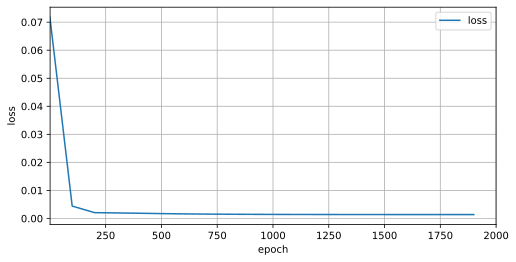

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 4 #A modifier en fonction des inputs
hidden_size = 2
num_layers = 1

num_classes = 4#A modifier en fonction des inputs

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, num_epochs],  
                            figsize=(8, 4), legend=['loss'])
# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        animator.add(epoch, (loss.item()))

On voit Ici que l'apprentissage est rapide et efficace du à la forme du "L" de la courbe qui est très nette et rapide.

In [ ]:
train_size = x_train.shape[0]
val_size = x_valid.shape[0]


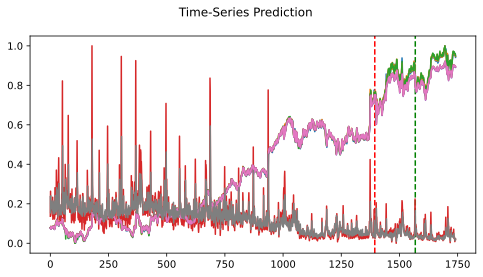

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()


plt.figure(figsize=(8,4))
plt.axvline(x=train_size, c='r', linestyle='--')
plt.axvline(x=train_size+val_size, c='g', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
_ = plt.suptitle('Time-Series Prediction')

In [ ]:
np.mean(np.abs(dataY_plot-data_predict)[train_size:train_size+val_size,1]) #erreur de validation

0.03254718

In [ ]:
np.mean(np.abs(dataY_plot-data_predict)[train_size:train_size+val_size,2]) #erreur de validation

0.030070562

On constate une erreur sur le volume plus importante lorsqu'on prend la moyenne.

On plot les stock norm pour open close et low afin de les comparer.

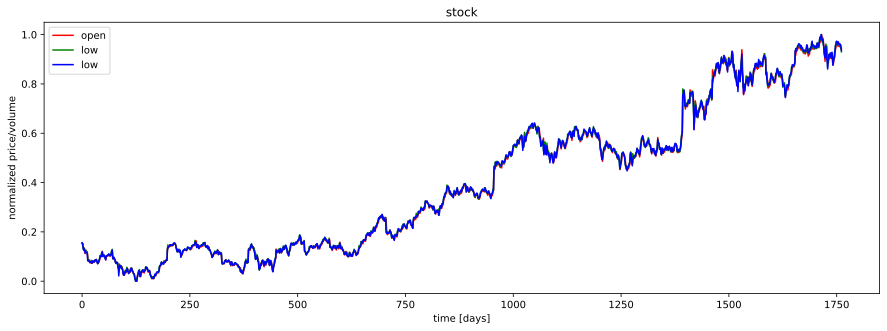

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')


plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume') 
plt.legend(loc='best')
plt.show()

In [ ]:
y_train.shape

(1394, 4)

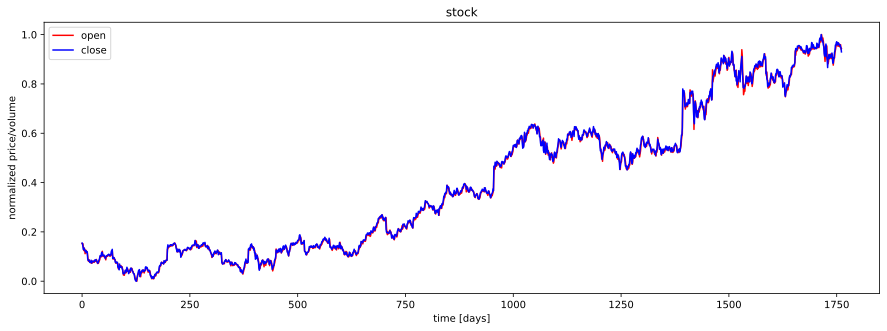

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='blue', label='close')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

------------------------------------------------
## GRU Method


In [ ]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob=0.1):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Forward propagation by passing in the input and hidden state into the model
        out, _ = self.gru(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out

On change les valeurs de input_size afin de prendre le volume en compte pour le comparer avec "low" et "close"

"\nnum_epochs = 2000\nlearning_rate = 0.01\n\ninput_size = 4\nhidden_size = 2\nnum_layers = 1\n\nnum_classes = 4\n\ngrumodel = GRUModel(num_classes, input_size, hidden_size, num_layers)\n\ncriterion = torch.nn.MSELoss()    # mean-squared error for regression\noptimizer = torch.optim.Adam(grumodel.parameters(), lr=learning_rate)\n\nanimator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, num_epochs],  \n                            figsize=(8, 4), legend=['loss'])\n# Train the model\nfor epoch in range(num_epochs):\n    outputs = grumodel(trainX)\n    optimizer.zero_grad()\n    \n    # obtain the loss function\n    loss = criterion(outputs, trainY)\n    \n    loss.backward()\n    \n    optimizer.step()\n    if epoch % 100 == 0:\n        animator.add(epoch, (loss.item()))\n        "

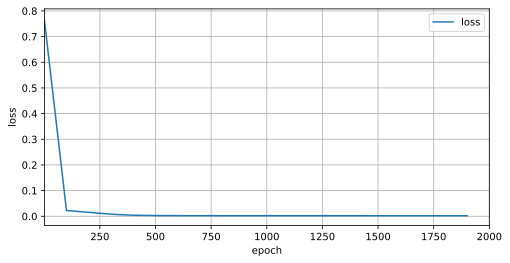

In [ ]:
input_dim = 4
hidden_dim = 2
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 4
 
grumodel = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
 
#if torch.cuda.is_available():
 #   grumodel.cuda()
     
# LOSS CLASS
criterion = torch.nn.MSELoss()
 
# OPTIMIZER CLASS

learning_rate = 0.1
 
optimizer = torch.optim.SGD(grumodel.parameters(), lr=learning_rate)  

animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, num_epochs],  
                            figsize=(8, 4), legend=['loss'])
# Train the model
for epoch in range(num_epochs):
    outputs = grumodel(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        animator.add(epoch, (loss.item()))

"""
num_epochs = 2000
learning_rate = 0.01

input_size = 4
hidden_size = 2
num_layers = 1

num_classes = 4

grumodel = GRUModel(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(grumodel.parameters(), lr=learning_rate)

animator = d2l.Animator(xlabel='epoch', ylabel='loss', xlim=[1, num_epochs],  
                            figsize=(8, 4), legend=['loss'])
# Train the model
for epoch in range(num_epochs):
    outputs = grumodel(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        animator.add(epoch, (loss.item()))
        """

In [ ]:
train_size = x_train.shape[0]
val_size = x_valid.shape[0]

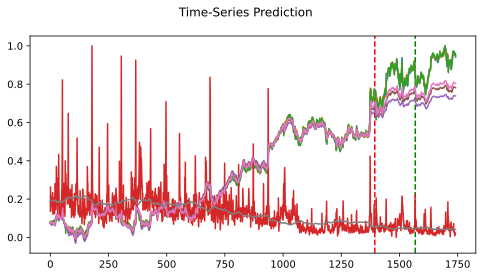

In [ ]:
# Utilisation du GRU modele
grumodel.eval()
train_predict_GRU = grumodel(dataX)

data_predict_GRU = train_predict_GRU.data.numpy()
dataY_plot = dataY.data.numpy()


plt.figure(figsize=(8,4))
plt.axvline(x=train_size, c='r', linestyle='--')
plt.axvline(x=train_size+val_size, c='g', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict_GRU)
_ = plt.suptitle('Time-Series Prediction')

In [ ]:
np.mean(np.abs(dataY_plot-data_predict)[train_size:train_size+val_size,1]) #erreur de validation

In [ ]:
np.mean(np.abs(dataY_plot-data_predict)[train_size:train_size+val_size,2]) #erreur de validation

0.030070562

------------------------------------------------------------------------
### Conclusion

Text(0.5, 0.98, 'GRU VS LSTM')

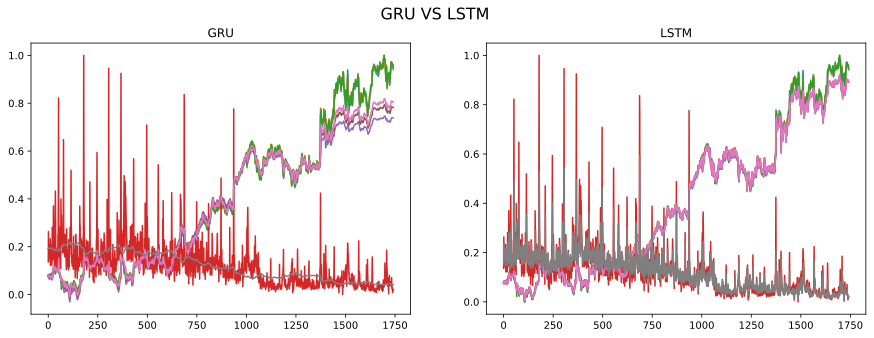

In [ ]:
## Comparaison
fig = plt.figure(figsize=(15, 5));

# GRU model
plt.subplot(1,2,1);
plt.plot(dataY_plot)
plt.plot(data_predict_GRU)
plt.title("GRU")

# LSTM model
plt.subplot(1,2,2);
plt.plot(dataY_plot)
plt.plot(data_predict)
plt.title("LSTM")

fig.suptitle("GRU VS LSTM", fontsize=16)



In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ":")
    print("Mean Absolute Error: {:.4f}".format(mae))
    print("Root Mean Square Error: {:.4f}".format(rmse))
    print("")


evaluate_prediction(data_predict_GRU, dataY_plot, "GRU")
evaluate_prediction(data_predict, dataY_plot, "LSTM")

GRU:
Mean Absolute Error: 0.0384
Root Mean Square Error: 0.0668

LSTM:
Mean Absolute Error: 0.0187
Root Mean Square Error: 0.0378



Dans le même contexte de travail avec le même nombre de couches, GRU utilisera moins de paramètres d'apprentissage et donc moins de mémoire et s'exécute doonc plus rapidement que LSTM, mais on perd en précision. Tandis que le LSTM modèle est plus précis sur un ensemble de données plus larges. 

Il faut donc utiliser GRU lorsque nous voulons consommer moins de mémoire et des résultats rapides, avec une assez bonne précision. Sinon, LSTM permettra d'atteindre une meilleure précision plus rapidement que le GRU (avec modification du nombre de hidden couches). 


------
##### Testons l'amélioration du modèle GRU avec 32 couches

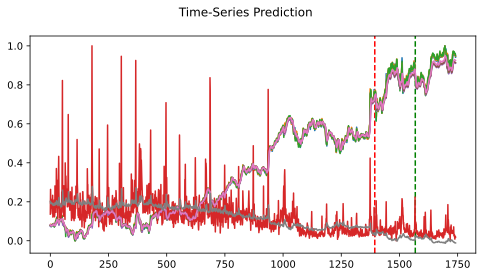

In [ ]:
input_dim = 4
hidden_dim = 32 # Modification du nombres de couches passage de 2 à 32
layer_dim = 1  # ONLY CHANGE IS HERE FROM ONE LAYER TO TWO LAYER
output_dim = 4
 
grumodel = GRUModel(input_dim, hidden_dim, layer_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
 
#if torch.cuda.is_available():
#   grumodel.cuda()
     
# LOSS CLASS
criterion = torch.nn.MSELoss()
 
# OPTIMIZER CLASS

learning_rate = 0.1
 
optimizer = torch.optim.SGD(grumodel.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    outputs = grumodel(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()


train_size = x_train.shape[0]
val_size = x_valid.shape[0]


# Utilisation du GRU modele
grumodel.eval()
train_predict_GRU_32 = grumodel(dataX)

data_predict_GRU_32 = train_predict_GRU_32.data.numpy() # Prediction du GRU modele
dataY_plot = dataY.data.numpy()


plt.figure(figsize=(8,4))
plt.axvline(x=train_size, c='r', linestyle='--')
plt.axvline(x=train_size+val_size, c='g', linestyle='--')

# Visualisation des résulats attendues et des prédictions
plt.plot(dataY_plot)
plt.plot(data_predict_GRU_32)
_ = plt.suptitle('Time-Series Prediction')

In [ ]:
evaluate_prediction(data_predict_GRU, dataY_plot, "GRU (2 couches)")
evaluate_prediction(data_predict_GRU_32, dataY_plot, "GRU (32 couches)")

GRU (2 couches):
Mean Absolute Error: 0.0384
Root Mean Square Error: 0.0668

GRU (32 couches):
Mean Absolute Error: 0.0222
Root Mean Square Error: 0.0422



On peut donc voir que le modèle GRU peut-être amélioré et perfectionné en augmentant le nombre de couches. Malgré tout, cela augmente le temps de mise en place du modèle. Il faut donc privilégier le modèle LSTM si oon souhaite de la précison et le modèle GRU si on souhaite de la rapidité.  

--------------------------------------------------


# Image Classification

Upload the badVsGood.zip

Helpers code to load dataset : 

In [ ]:
transform_train = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224), # to be compatible with torchvision classifier input
                                 transforms.ToTensor()])

transform_test = transforms.Compose([transforms.Resize(255),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor()])

In [ ]:
train_dataset = datasets.ImageFolder('badVsgood/badVsgood/train', transform=transform_train)
test_dataset = datasets.ImageFolder('badVsgood/badVsgood/test', transform=transform_test)


In [ ]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
batch_size=20

## [Question ] Build a classifier on the data with three classifier from torchvision package [https://pytorch.org/vision/stable/models.html#classification] (for example resnet18 / resnet50 and resnet101) and compare the performance. Try to fully train data and to fine-tune pre-trainned model. Try to optimize the performance by adding some transformation to the transform_train pipeline 

Version du TD6 de la standardisation

In [ ]:
# Specify the means and standard deviations of the three RGB channels to
# standardize each channel 
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    normalize])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

## Restnet18

Defining and Initializing the Model

We use ResNet-18, which was pretrained.

In [ ]:
pretrained_net = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(512,batch_size)
nn.init.xavier_uniform_(finetune_net.fc.weight);

Since the mains model parameters were obtained via pretraining on ImageNet, they are effective.

Therefore, we can only use a small learning rate to fine-tune such pretrained parameters.

In contrast, model parameters in the output layer are randomly initialized and generally require a larger learning rate to be learned from scratch. Letting the base learning rate be η, a learning rate of 10η will be used to iterate the model parameters in the output layer.

First, we define a training function train_fine_tuning that uses fine-tuning so it can be called multiple times.


Definition de la fonction fine tune

In [ ]:
# If `param_group=True`, the model parameters in the output layer will be
# updated using a learning rate ten times greater
def train_fine_tuning(net, learning_rate, batch_size=batch_size, num_epochs=5,
                      param_group=True):
    # construct the Dataloader :
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder('badVsgood/badVsgood/train',
     transform=train_augs),
        batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        'badVsgood/badVsgood/test', transform=test_augs),
        batch_size=batch_size)
    
    devices = d2l.try_all_gpus()
    # The Loss : 
    loss = nn.CrossEntropyLoss(reduction="none")

    # The optimizer :     
    if param_group:
        params_1x = [param for name, param in net.named_parameters()
             if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{'params': params_1x},
                                   {'params': net.fc.parameters(),
                                    'lr': learning_rate * 10}],
                                lr=learning_rate, weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
                   devices)

Ce qui se passe si on prend un learning rate plus petit

loss 3.259, train acc 0.100, test acc 0.050
317.1 examples/sec on [device(type='cuda', index=0)]


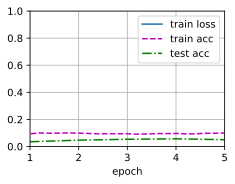

In [ ]:
train_fine_tuning(finetune_net, 5e-10)

Learning rate de référence

loss 0.257, train acc 0.895, test acc 0.957
324.8 examples/sec on [device(type='cuda', index=0)]


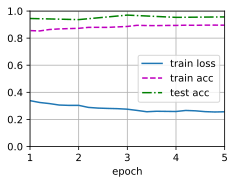

In [ ]:
train_fine_tuning(finetune_net, 5e-5)

Learning rate plus grand

In [ ]:
train_fine_tuning(finetune_net, 5e-2)

loss 0.442, train acc 0.787, test acc 0.820
324.2 examples/sec on [device(type='cuda', index=0)]


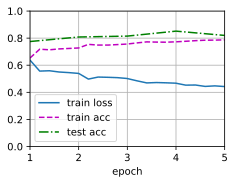

In [ ]:
scratch_net = torchvision.models.resnet18()
scratch_net.fc = nn.Linear(scratch_net.fc.in_features, 2)
train_fine_tuning(scratch_net, 5e-4, param_group=False)

Ici on remarque que le scratch_net fonctionne moins bien que le pretrained justement car il n'a pas encore été optimisé

In [ ]:
#test avec un learning rate plus petit comme cela impact les performances
scratch_net = torchvision.models.resnet18()
scratch_net.fc = nn.Linear(scratch_net.fc.in_features, 2)
train_fine_tuning(scratch_net, 5e-5, param_group=False)

En modifiant les paramètres du transformation :

In [ ]:
# Specify the means and standard deviations of the three RGB channels to
# standardize each channel 
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.150, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(150),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    normalize])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(150),
    torchvision.transforms.ToTensor(),
    normalize])

In [ ]:
scratch_net = torchvision.models.resnet18()
scratch_net.fc = nn.Linear(scratch_net.fc.in_features, 2)
train_fine_tuning(scratch_net, 5e-4, param_group=False,num_epochs=3)

## Restnet50

In [ ]:
#a cause d'un problème de mémoire
torch.cuda.empty_cache()
!pip install numba

from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [ ]:
# Specify the means and standard deviations of the three RGB channels to
# standardize each channel 
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    normalize])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

In [ ]:
pretrained_net = torchvision.models.resnet50(pretrained=True)

In [ ]:
finetune_net_50 = torchvision.models.resnet50(pretrained=True)
finetune_net_50.fc = nn.Linear(2048,128)
nn.init.xavier_uniform_(finetune_net_50.fc.weight);

In [ ]:
train_fine_tuning(finetune_net_50, 5e-5)

C'est un résultat cohérent avec le fait que le modèle est pretrained. On remarque même que nous aurions pu nous arreter à 3 epochs.

In [ ]:
scratch_net_50 = torchvision.models.resnet50()
scratch_net_50.fc = nn.Linear(scratch_net_50.fc.in_features, 2)
train_fine_tuning(scratch_net_50, 5e-4, param_group=False)

La différence entre le resnet 50 et le 18 correspond au nombre de couche de neuronne qu'il y a. On remarque ici que le scratch met plus de temps à devenir efficace car il faut plus de données pour correctement paramétrer le poids des neurones si l'algorithme n'est pas optimisé. Il fat donc adpater le resnet utilisé en fonction de la taille de base de donnée utilisée.

En terme d'efficacité, le 18 tourne plus vite et le test_accuracy semble très similaire.

## Restnet101

In [ ]:
#a cause d'un problème de mémoire
!pip install numba

from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [ ]:
pretrained_net = torchvision.models.resnet101(pretrained=True)

In [ ]:
finetune_net_101 = torchvision.models.resnet101(pretrained=True)
finetune_net_101.fc = nn.Linear(2048,128)
nn.init.xavier_uniform_(finetune_net_101.fc.weight);

In [ ]:
train_fine_tuning(finetune_net_101, 5e-5)

In [ ]:
scratch_net_101 = torchvision.models.resnet50()
scratch_net_101.fc = nn.Linear(scratch_net_101.fc.in_features, 2)
train_fine_tuning(scratch_net_101, 5e-4, param_group=False)